In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

In [2]:
df = pd.read_csv('실전db.csv')

In [3]:
df['JOIN_DATE'] = pd.to_datetime(df['JOIN_DATE'])
df['DATE'] = pd.to_datetime(df['DATE'])

df['USER_ID'] = df['USER_ID'].astype(str)
df['STORE_ID'] = df['STORE_ID'].astype(str)

In [4]:
Train = df.query('DATE <= "2020.09.30"')
Test = df.query('"2020.10.01"<=DATE<="2020.12.31"')

In [5]:
df['요일'] = df['DATE'].dt.day_name()

In [6]:
df['요일'].value_counts()

Friday       137917
Thursday     133616
Wednesday    132285
Saturday     131480
Tuesday      130681
Monday       127052
Sunday        86240
Name: 요일, dtype: int64

In [7]:
df['USER_ID'].nunique()

165425

In [8]:
df['D_TYPE'].value_counts()

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64

In [9]:
df['월'] = df['DATE'].dt.month

In [10]:
df.sort_values('JOIN_DATE')

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,월
176320,1071641,1970-01-01,CC,221045,A,2020-04-03,1,GN,Friday,4
625539,1686813,1970-01-01,CC,223023,A,2020-10-02,1,YD,Friday,10
226658,859401,1970-01-01,CC,102276,B,2020-04-27,1,SC,Monday,4
226415,654237,1970-01-01,CC,181777,C,2020-04-27,1,BF,Monday,4
226042,1552374,1970-01-01,CC,28018,C,2020-04-26,1,JRR,Sunday,4
...,...,...,...,...,...,...,...,...,...,...
879214,1829871,2020-12-31,AA,223058,B,2020-12-31,1,BF,Thursday,12
879213,1829862,2020-12-31,AA,109877,C,2020-12-31,1,GN,Thursday,12
879212,1829858,2020-12-31,AA,173268,A,2020-12-31,1,J,Thursday,12
879230,1829959,2020-12-31,BB,230814,A,2020-12-31,1,MP,Thursday,12


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  object        
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  object        
 3   STORE_ID    879271 non-null  object        
 4   GOODS_TYPE  879271 non-null  object        
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  object        
 8   요일          879271 non-null  object        
 9   월           879271 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 67.1+ MB


In [12]:
df['월'] = df['월'].astype(str)
df['월'] = df['월'].str.zfill(2)

In [27]:
df.groupby(['USER_ID','D_TYPE'])[['COUNT']].sum()

,,COUNT
USER_ID,D_TYPE,
1000024,AA,1
1000036,AA,3
1000100,BB,2
1000108,AA,3
1000111,BB,3
...,...,...
999911,BB,4
999916,AA,6
999932,AA,1


- USER_ID별로 D_TYPE은 1개씩 부여됨 (가입시에 부여되는 것으로 보임)

### 요일별 결제 건수

<AxesSubplot:xlabel='요일', ylabel='COUNT'>

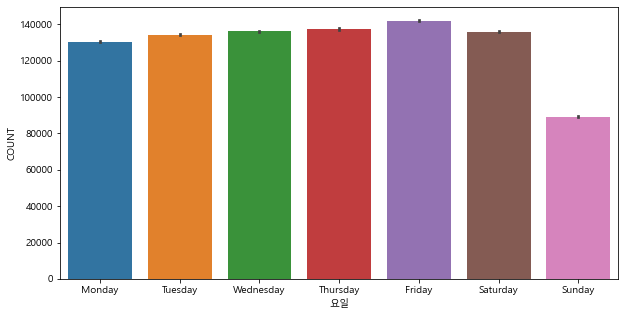

In [28]:
# 요일별 결제 건수
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='요일', y='COUNT', 
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], estimator=sum)

- 일요일에 결제 건수가 매우 낮음

### 요일별 goods_type별 결제 건수

<AxesSubplot:xlabel='요일', ylabel='COUNT'>

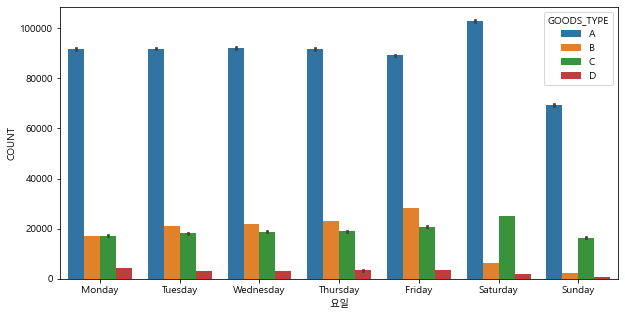

In [29]:
# 요일별 goods_type별 결제 건수
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='요일', y='COUNT',hue='GOODS_TYPE', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
             hue_order=['A','B','C','D'], estimator=sum)

- 주말에는 B TYPE 결제 건수가 급격히 감소
- 특히 일요일의 경우 A TYPE도 감소

- A 타입: 월~토
- B 타입: 월~금 평일
- C 타입: 요일별 차이 적음
- D 타입: 월~금 평일

### 월별 결제 건수


<AxesSubplot:xlabel='월', ylabel='COUNT'>

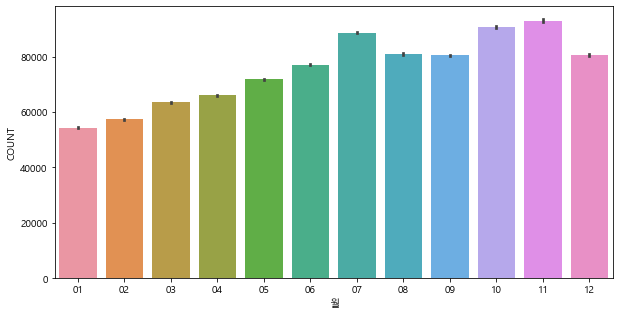

In [30]:
# 월별 결제 건수
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='월', y='COUNT', estimator=sum)

- 우상향 하는 모습을 보임
- 내년 데이터가 있었으면 좋았을듯함.
- 계절적 요인이 있다고 보기는 어려울듯

### 월별 goods_type별 평균 구매 


<AxesSubplot:xlabel='월', ylabel='COUNT'>

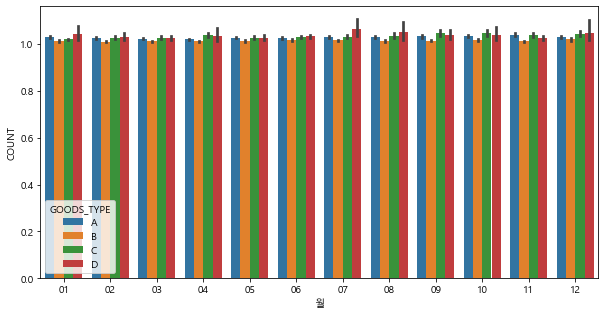

In [31]:
# 월별 goods_type별 평균 구매 
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='월', y='COUNT', hue='GOODS_TYPE',hue_order=['A','B','C','D'])

- 평균은 역시나 비슷하다
- 월별로 goods type별 결제 건수의 차이를 확인해보는 것이 좋을듯

In [32]:
df['COUNT'].mean()

1.0290786344596832

In [33]:
df['AD1'].value_counts()

J      179383
GN     172967
JRR    126586
SC      75856
MP      67819
        ...  
ADS         1
VO          1
NW          1
GR          1
DY          1
Name: AD1, Length: 85, dtype: int64

In [208]:
order_list = df['AD1'].value_counts().index.to_list()

- AD1의 값들은 대한민국의 구 이름으로 보임

### 결제 건수 상위 10개 지역


<AxesSubplot:xlabel='AD1', ylabel='COUNT'>

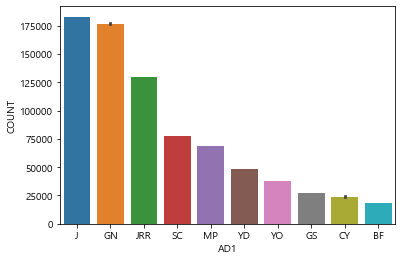

In [223]:
# 결제 건수 상위 10개 지역
sns.barplot(data=df, x='AD1', y='COUNT',order=order_list[:10], estimator=sum)

###  월별 요일별 지역별 결제 건수

In [36]:
# 월별 요일별 지역별 결제 건수
df.groupby(['월','요일','AD1'])[['COUNT']].sum().sort_values(['월','요일','COUNT'], ascending=[True, True, False])

COUNT
월  요일        AD1       
01 Friday    J     1747
             GN    1716
             JRR   1529
             MP     905
             SC     894
...                 ...
12 Wednesday CAS      1
             CVB      1
             DOI      1
             VU       1
             WH       1

[4371 rows x 1 columns]

In [37]:
grouped = df.groupby(['월','요일','AD1'])[['COUNT']].sum().sort_values(['월','요일','COUNT'], ascending=[True, True, False]).reset_index()
grouped

,월,요일,AD1,COUNT
0,01,Friday,J,1747
1,01,Friday,GN,1716
2,01,Friday,JRR,1529
3,01,Friday,MP,905
4,01,Friday,SC,894
...,...,...,...,...
4366,12,Wednesday,CAS,1
4367,12,Wednesday,CVB,1
4368,12,Wednesday,DOI,1
4369,12,Wednesday,VU,1


### 월별 요일별 top5 지역

In [38]:
# 월별 요일별 top5 지역
top_5 = grouped.groupby(['월','요일']).head(5)
top_5

,월,요일,AD1,COUNT
0,01,Friday,J,1747
1,01,Friday,GN,1716
2,01,Friday,JRR,1529
3,01,Friday,MP,905
4,01,Friday,SC,894
...,...,...,...,...
4312,12,Wednesday,J,3521
4313,12,Wednesday,GN,2636
4314,12,Wednesday,JRR,2272
4315,12,Wednesday,SC,1091


In [39]:
월_list = top_5['월'].unique().tolist()

### 월별 요일별 지역별 결제 건수

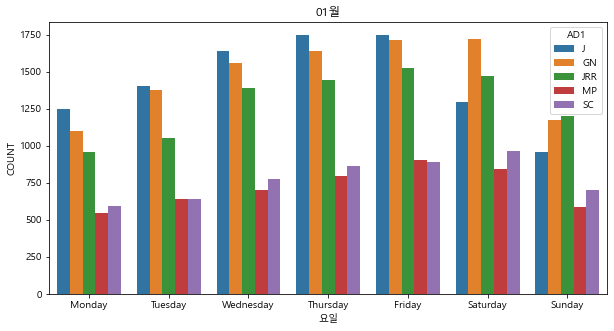

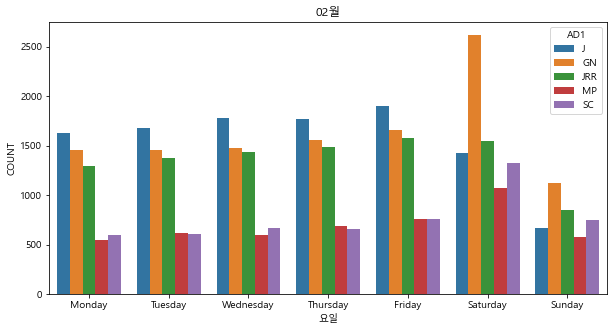

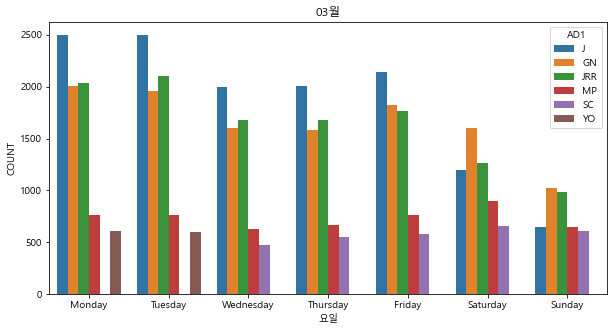

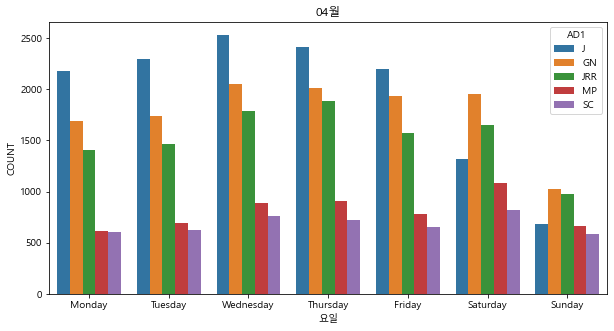

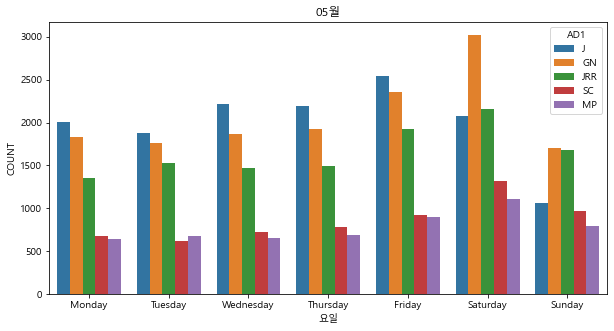

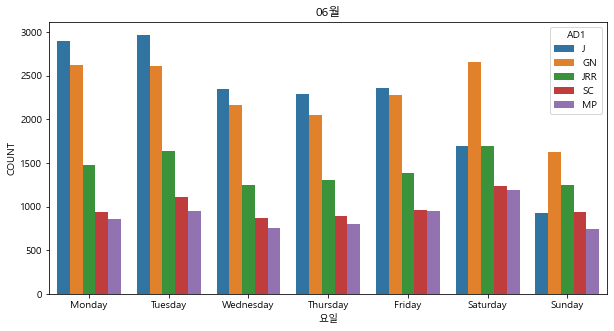

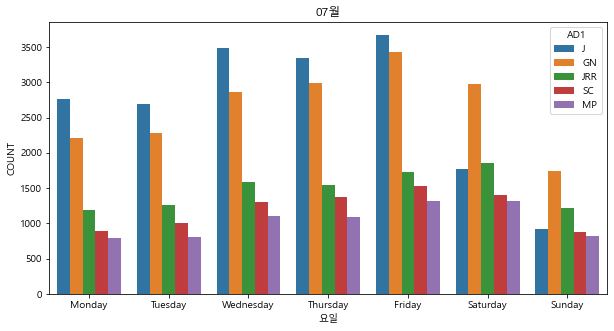

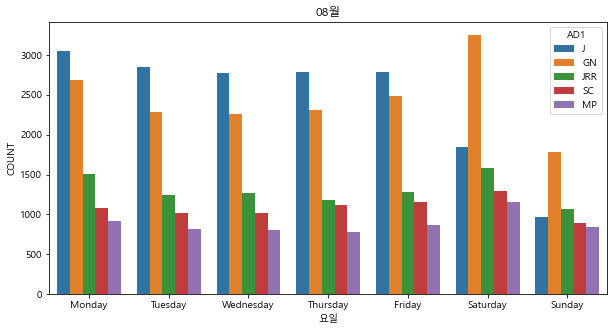

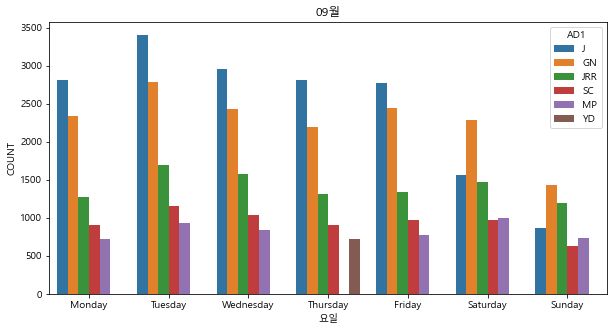

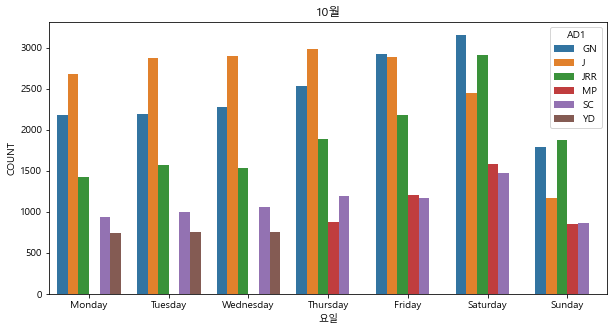

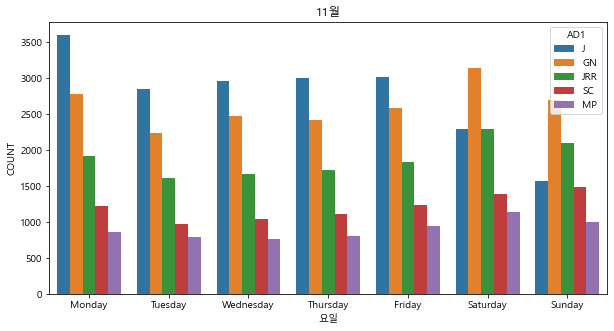

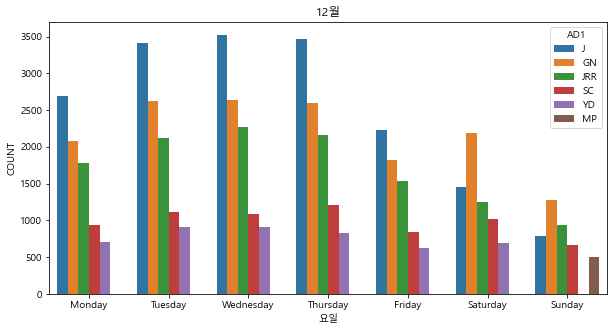

In [40]:
# 월별 요일별 지역별 결제 건수

for 월 in 월_list:
    plt.figure(figsize=(10,5))
    sns.barplot(data=top_5[top_5['월']==월], x='요일', y='COUNT', hue='AD1',
               order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.title(월 +'월')

### 요일별 지역별 결제 건수

<AxesSubplot:xlabel='요일', ylabel='COUNT'>

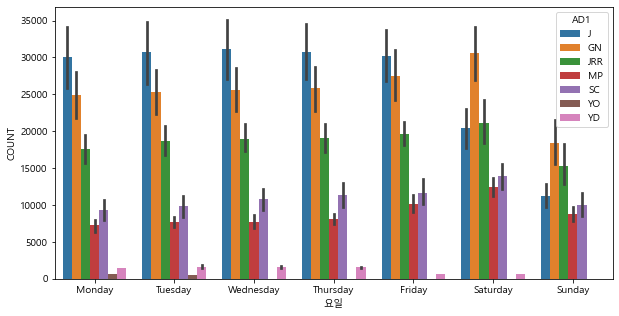

In [50]:
# 요일별 지역별 결제 건수
plt.figure(figsize=(10,5))
sns.barplot(data=top_5, x='요일', y='COUNT', hue='AD1', estimator=sum,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

### 결제 횟수별로 user의 등급을 나눠보자

In [25]:
user별_결제횟수 = df.groupby('USER_ID')[['COUNT']].sum().reset_index()
user별_결제횟수

,USER_ID,COUNT
0,1000024,1
1,1000036,3
2,1000100,2
3,1000108,3
4,1000111,3
...,...,...
165420,999911,4
165421,999916,6
165422,999932,1
165423,999933,1


In [129]:
user별_결제횟수.sort_values(by='COUNT',ascending=False)[:20]

,USER_ID,COUNT
57441,1514190,284
137064,591610,245
46821,1467323,239
32645,1355841,235
19011,1224426,223
33627,1365069,222
38571,1407916,222
24992,1284291,217
11523,1144500,213
158925,909315,209


#### USER_ID 999665는 도대체 뭐하는 사람일까

In [77]:
df[df['USER_ID']=='999665']

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,월
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,Wednesday,01
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,Thursday,01
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,Friday,01
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,Saturday,01
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN,Sunday,01
...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,Sunday,12
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,Monday,12
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,Tuesday,12
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,Wednesday,12


In [82]:
df[df['USER_ID']=='999665'].describe()

,COUNT
count,366.000000
mean,21.636612
std,11.046188
min,3.000000
25%,13.000000
50%,19.000000
75%,28.000000
max,61.000000


- 매일 매일 결제를 했으며 일 평균 21회 결제했고, 하루 최소 3번, 최대 61번 결제했음.
- 이상치로 판단되니 drop하자

In [83]:
df = df[df['USER_ID']!='999665']

In [85]:
user별_결제횟수 = user별_결제횟수[user별_결제횟수['USER_ID']!='999665']

In [95]:
pd.cut(user별_결제횟수['COUNT'], bins=10)

0         (0.717, 29.3]
1         (0.717, 29.3]
2         (0.717, 29.3]
3         (0.717, 29.3]
4         (0.717, 29.3]
              ...      
165420    (0.717, 29.3]
165421    (0.717, 29.3]
165422    (0.717, 29.3]
165423    (0.717, 29.3]
165424    (0.717, 29.3]
Name: COUNT, Length: 165424, dtype: category
Categories (10, interval[float64]): [(0.717, 29.3] < (29.3, 57.6] < (57.6, 85.9] < (85.9, 114.2] ... (170.8, 199.1] < (199.1, 227.4] < (227.4, 255.7] < (255.7, 284.0]]

In [131]:
pd.cut(user별_결제횟수['COUNT'], bins=10).value_counts().sort_index()

(0.717, 29.3]     159871
(29.3, 57.6]        3718
(57.6, 85.9]        1082
(85.9, 114.2]        427
(114.2, 142.5]       189
(142.5, 170.8]        82
(170.8, 199.1]        39
(199.1, 227.4]        12
(227.4, 255.7]         3
(255.7, 284.0]         1
Name: COUNT, dtype: int64

In [177]:
# 총 유저는165424명
bins = [1,2,6,20,10000]

In [178]:
pd.cut(user별_결제횟수['COUNT'], right=False, bins=bins).value_counts().sort_index()

[1, 2)         73947
[2, 6)         56998
[6, 20)        24998
[20, 10000)     9481
Name: COUNT, dtype: int64

In [179]:
tdf = pd.DataFrame(pd.cut(user별_결제횟수['COUNT'], right=False, bins=bins).value_counts().sort_index())
tdf['비율(%)'] = tdf['COUNT'] /165424 * 100
tdf

,COUNT,비율(%)
"[1, 2)",73947,44.701494
"[2, 6)",56998,34.455702
"[6, 20)",24998,15.111471
"[20, 10000)",9481,5.731333


#### 1년 기준
- 결제 횟수 1번 : D등급 (약 45%)
- 결제 횟수 2번~5번 : C등급 (약 35%)
- 결제 횟수 6~19번: 결제자: B등급 (약 15%)
- 20번 이상 결제자: A등급 (약 5%)

#### 파레토의 법칙
- A,B 등급의 매출이 전체 매출의 80%를 차지함
> 즉, 현재 기준으로 연 1~5회 결제자들을 연 6회 이상 결제하도록 유도하는 전략 필요

In [182]:
bins_label = ['D등급','C등급','B등급','A등급']

In [184]:
tdf = pd.DataFrame(pd.cut(user별_결제횟수['COUNT'], right=False, bins=bins,
                         labels=bins_label).value_counts().sort_index())
tdf['비율(%)'] = tdf['COUNT'] /165424 * 100
tdf

,COUNT,비율(%)
D등급,73947,44.701494
C등급,56998,34.455702
B등급,24998,15.111471
A등급,9481,5.731333


In [196]:
# 함수 만들기
def count_category(count):
    category = ''
    if count == 1:
        category = 'D등급'
    elif 2 <= count <= 5:
        category = 'C등급'
    elif 6 <= count <= 19:
        category = 'B등급'
    else:
        category = 'A등급'
        
    return category

In [197]:
user별_결제횟수['회원등급'] = user별_결제횟수['COUNT'].apply(count_category)

<ipython-input-197-c3ce470152db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user별_결제횟수['회원등급'] = user별_결제횟수['COUNT'].apply(count_category)


In [199]:
user별_결제횟수

,USER_ID,COUNT,회원등급
0,1000024,1,D등급
1,1000036,3,C등급
2,1000100,2,C등급
3,1000108,3,C등급
4,1000111,3,C등급
...,...,...,...
165420,999911,4,C등급
165421,999916,6,B등급
165422,999932,1,D등급
165423,999933,1,D등급


In [203]:
df2 = pd.merge(df,user별_결제횟수, how='inner',on='USER_ID')
df2.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT_x,AD1,요일,월,COUNT_y,회원등급
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,Wednesday,01,1,D등급
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,Wednesday,01,2,C등급
2,5647,2014-02-14,BB,91417,B,2020-02-10,1,SD,Monday,02,2,C등급
3,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,Wednesday,01,3,C등급
4,33314,2014-11-20,BB,220077,C,2020-05-01,1,JRR,Friday,05,3,C등급


In [205]:
df2.rename(columns={'COUNT_x' : 'COUNT',
                   'COUNT_y' : 'sum(COUNT)'}, inplace=True)

In [206]:
df2

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,월,sum(COUNT),회원등급
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,Wednesday,01,1,D등급
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,Wednesday,01,2,C등급
2,5647,2014-02-14,BB,91417,B,2020-02-10,1,SD,Monday,02,2,C등급
3,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,Wednesday,01,3,C등급
4,33314,2014-11-20,BB,220077,C,2020-05-01,1,JRR,Friday,05,3,C등급
...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,Thursday,12,1,D등급
878901,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,Thursday,12,1,D등급
878902,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,Thursday,12,1,D등급
878903,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,Thursday,12,1,D등급


### 회원 등급별로 주로 결제하는 장소(AD1)의 차이가 있을까?

<AxesSubplot:xlabel='AD1', ylabel='COUNT'>

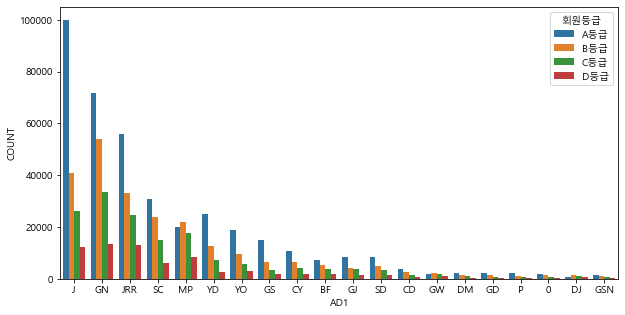

In [219]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='AD1',y='COUNT',hue='회원등급',
            order = order_list[:20], hue_order = ['A등급','B등급','C등급','D등급'],
           estimator=len)

<AxesSubplot:xlabel='AD1', ylabel='COUNT'>

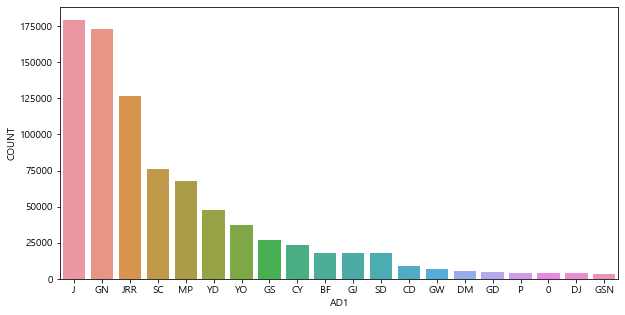

In [224]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='AD1', y='COUNT',order=order_list[:20], estimator=len)

- C,D 등급을 B등급으로 끌어올리기 위해서는 마포구를 공략하는 전략 필요

### 결제요일별 회원등급

<AxesSubplot:xlabel='요일', ylabel='COUNT'>

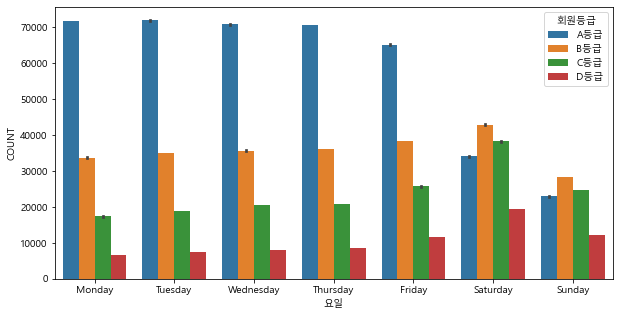

In [226]:
plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='요일', y='COUNT', estimator=sum,
           hue = '회원등급', hue_order = ['A등급','B등급','C등급','D등급'],
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

- A등급자들의 경우 평일에 주로 결제하는 것으로 보아 직장인일 것으로 추정됨
- 그 외 B,C,D 등급의 경우 A등급 대비 평일보다 주말에 더 많이 결제함
- 따라서 직장인 고객을 증가시키기 위해 직장인을 대상으로 프로모션을 진행할 필요가 있음

In [231]:
df_평일 = df2[(df2['요일']!='Saturday') & (df2['요일']!='Sunday')]

In [232]:
df_평일['요일'].value_counts()

Friday       137865
Thursday     133563
Wednesday    132232
Tuesday      130629
Monday       127000
Name: 요일, dtype: int64

### 평일 기준, 지역별 회원등급 (직장인으로 추정되는 A가 많은 지역 판단 위함)

<AxesSubplot:xlabel='AD1', ylabel='COUNT'>

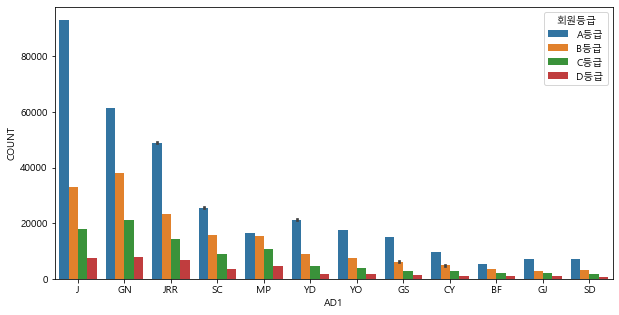

In [233]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_평일, x='AD1',y='COUNT',hue='회원등급',
            order = order_list[:12], hue_order = ['A등급','B등급','C등급','D등급'],
           estimator=sum)

In [238]:
'YDP' in df['AD1'].unique().tolist()

False

- 중구, 강남, 종로(혹은 중랑), 서초, 영등포 등 직장이 밀집되어 있을 것으로 보임
- 마포구는 직장인이 별로 없는 것인지 인프라가 부족한 것인지 수가 적음.

In [246]:
df_주말 = df2[(df2['요일']=='Saturday') | (df2['요일']=='Sunday')]

In [247]:
df_주말['요일'].value_counts()

Saturday    131428
Sunday       86188
Name: 요일, dtype: int64

### 주말 기준, 지역별 회원 등급

<AxesSubplot:xlabel='AD1', ylabel='COUNT'>

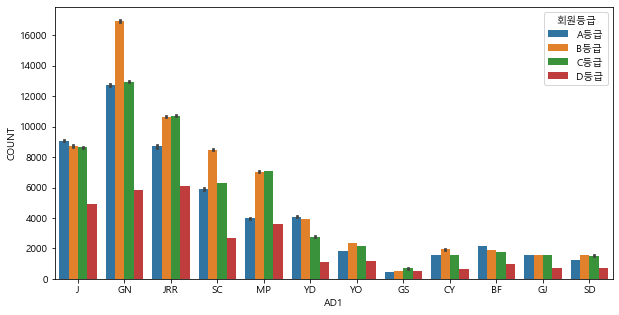

In [248]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_주말, x='AD1',y='COUNT',hue='회원등급',
            order = order_list[:12], hue_order = ['A등급','B등급','C등급','D등급'],
           estimator=sum)